# Data preprocessing

Importing the data into dataframe.

In [1]:
import pandas as pd

df = pd.read_csv("vdjdb.txt", sep='\t')

In [2]:
df.isnull().sum()

complex.id             0
gene                   0
cdr3                   0
v.segm               101
j.segm              1145
species                0
mhc.a                  0
mhc.b                  0
mhc.class              0
antigen.epitope        0
antigen.gene          62
antigen.species        0
reference.id        1511
method                 0
meta                   0
cdr3fix                0
vdjdb.score            0
web.method             0
web.method.seq         0
web.cdr3fix.nc         0
web.cdr3fix.unmp       0
dtype: int64

In [3]:
df= df[['complex.id','gene','cdr3','v.segm','j.segm','species','mhc.class','antigen.species','antigen.epitope','vdjdb.score']]

In [4]:
df = df.rename(columns={"complex.id": "ComplexID","gene": "Gene","cdr3": "CDR3", "v.segm": "V","j.segm": "J","species": "Species","mhc.class": "MHCclass"
                  ,"antigen.species": "EpitopeSpecies","antigen.epitope": "Epitope","vdjdb.score": "Score"})

In [5]:
len(df)

92771

Check how many records that have zero score.

In [6]:
df_z = df[df['Score'] == 0]

In [7]:
len(df_z)

80357

Only take the records that has score not equal to zero.

In [8]:
df = df[df['Score'] != 0]

In [9]:
len(df)

12414

Check null values.

In [10]:
df.isnull().sum()

ComplexID           0
Gene                0
CDR3                0
V                  28
J                 258
Species             0
MHCclass            0
EpitopeSpecies      0
Epitope             0
Score               0
dtype: int64

In [11]:
nan_values = df[df.isna().any(axis=1)]

nan_values

,ComplexID,Gene,CDR3,V,J,Species,MHCclass,EpitopeSpecies,Epitope,Score
5,3,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,MHCI,HIV-1,FLKEKGGL,2
14,7,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,MHCI,HIV-1,FLKEQGGL,2
21,10,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,MHCI,HIV-1,FLKETGGL,2
28,13,TRA,CAVKASGSRLT,TRAV2*01,NaN,HomoSapiens,MHCI,HIV-1,FLKEMGGL,2
1209,0,TRB,CASSTGDHSNQPQHFG,TRBV27*01,NaN,HomoSapiens,MHCI,CMV,YSEHPTFTSQY,1
...,...,...,...,...,...,...,...,...,...,...
83753,0,TRA,CATNASSNTGKLI,NaN,NaN,MacacaMulatta,MHCI,SIV,TTPESANL,1
83757,0,TRA,CVLRAGGGYVLT,NaN,NaN,MacacaMulatta,MHCI,SIV,TTPESANL,1
88607,29453,TRA,CAASTGGQKLLF,TRAV13-1*01,NaN,HomoSapiens,MHCI,SARS-CoV-2,SPRWYFYYL,2
90002,0,TRA,CAVRDIRGQGFSFIF,TRAV3*01,NaN,HomoSapiens,MHCI,SARS-CoV-2,QYIKWPWYI,1


Drop null values.

In [12]:
df = df.dropna()
df.isnull().sum()

ComplexID         0
Gene              0
CDR3              0
V                 0
J                 0
Species           0
MHCclass          0
EpitopeSpecies    0
Epitope           0
Score             0
dtype: int64

In [13]:
len(df)

12156

Split the data into 3 subsets using specific columns. So we end up with three species (Human, Mouse, and Monkey).

In [14]:
unique_values = df['Species'].unique()

print(unique_values)

['HomoSapiens' 'MusMusculus' 'MacacaMulatta']


In [16]:
dfh = df[df['Species'] == 'HomoSapiens'] #human
dfm = df[df['Species'] == 'MusMusculus'] #mouse
dfmu = df[df['Species'] == 'MacacaMulatta'] #monkey

In [17]:
len(dfh)

9376

In [18]:
len(dfm)

2121

In [19]:
len(dfmu)

659

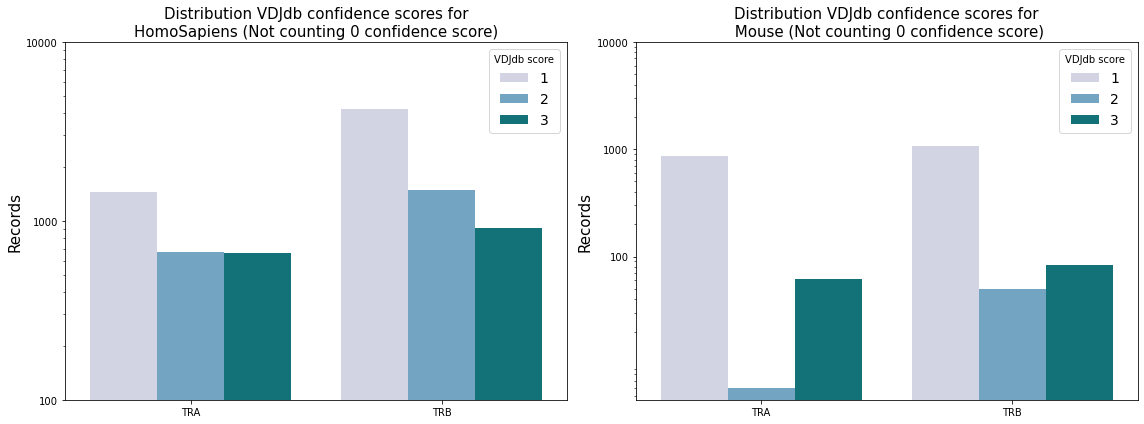

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_human = dfh.groupby(['Gene', 'Score']).size().reset_index(name='total')
df_mouse = dfm.groupby(['Gene', 'Score']).size().reset_index(name='total')
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=df_human, x='Gene', y='total', hue='Score', dodge=True, palette="PuBuGn", ax=axs[0])
axs[0].set_xlabel('')  
axs[0].set_ylabel('Records', fontsize=15)  
axs[0].set_yscale('log')
axs[0].legend(title='VDJdb score', loc='upper right',fontsize=14)
axs[0].set_title('Distribution VDJdb confidence scores for\nHomoSapiens (Not counting 0 confidence score)', fontsize=15)  # Set title font size

ticks = [100, 1000, 10000]
axs[0].set_yticks(ticks)
axs[0].set_yticklabels([f'{tick}' for tick in ticks])

sns.barplot(data=df_mouse, x='Gene', y='total', hue='Score', dodge=True, palette="PuBuGn", ax=axs[1])
axs[1].set_xlabel('')  
axs[1].set_ylabel('Records', fontsize=15)  
axs[1].set_yscale('log')
axs[1].legend(title='VDJdb score', loc='upper right',fontsize=14)
axs[1].set_title('Distribution VDJdb confidence scores for\n Mouse (Not counting 0 confidence score)', fontsize=15)  # Set title font size

axs[1].set_yticks(ticks)
axs[1].set_yticklabels([f'{tick}' for tick in ticks])

plt.tight_layout()
plt.show()


# Mouse Data Cleaning and Mesuring the distance.

In [22]:
#dfm

In [23]:
dfm = dfm.dropna()

In [24]:
len(dfm)

2121

Split the mouse data frame into two sub-data frames. The first one contains the CDR3_alpha sequences and all afflicted data from other columns. The second one contains CDR3_beta sequences and all the associated data from other columns. 

In [25]:
dfm_alpha = dfm[dfm['Gene'] == 'TRA']
dfm_beta = dfm[dfm['Gene'] == 'TRB']

In [26]:
dfm_alpha.reset_index(drop=True, inplace=True)
dfm_beta.reset_index(drop=True, inplace=True)

In [27]:
#dfm_alpha # TCRs of alpha chain mouse

In [28]:
len(dfm_beta)

1194

In [29]:
len(dfm_alpha)

927

# Plotting mouse TCRs alpha chain:

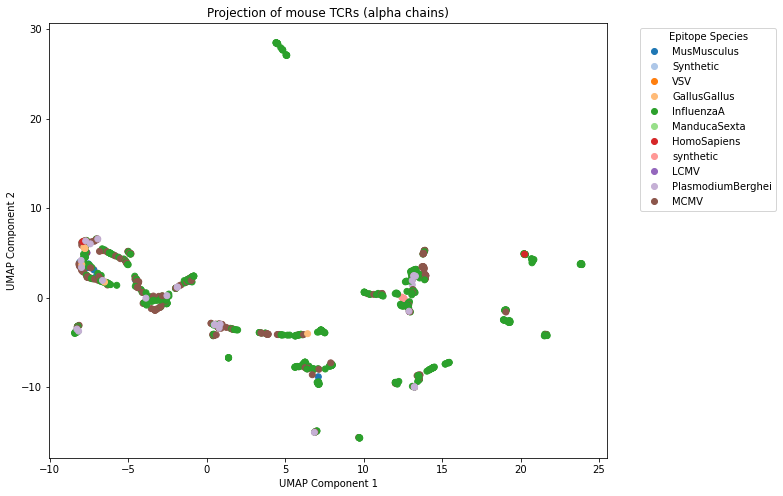

In [30]:
import umap
from sklearn.preprocessing import StandardScaler
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = dfm_alpha[["CDR3","V","J","Epitope",'EpitopeSpecies']].copy()
CDR3_encoder = LabelEncoder()
data.loc[:, 'encoded_CDR3'] = CDR3_encoder.fit_transform(data['CDR3'])
V_encoder = LabelEncoder()
data.loc[:, 'encoded_V'] = V_encoder.fit_transform(data['V'])
J_encoder = LabelEncoder()
data.loc[:, 'encoded_J'] = J_encoder.fit_transform(data['J'])
epitope_encoder = LabelEncoder()
data.loc[:, 'encoded_epitope'] = epitope_encoder.fit_transform(data['Epitope'])
features = data[['encoded_CDR3', 'encoded_V','encoded_J','encoded_epitope']]

reducer = umap.UMAP()
embedding = reducer.fit_transform(features)
unique_epitopes = data['EpitopeSpecies'].unique()
color_dict = {epitope: plt.cm.tab20(i) for i, epitope in enumerate(unique_epitopes)}

colors = [color_dict[epitope] for epitope in data['EpitopeSpecies']]

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title('Projection of mouse TCRs (alpha chains)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

handles = [plt.Line2D([0], [0], marker='o', color=color_dict[epitope], label=epitope, linestyle='None') for epitope in unique_epitopes]
plt.legend(handles=handles, title='Epitope Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Plotting mouse TCRs beta chains:

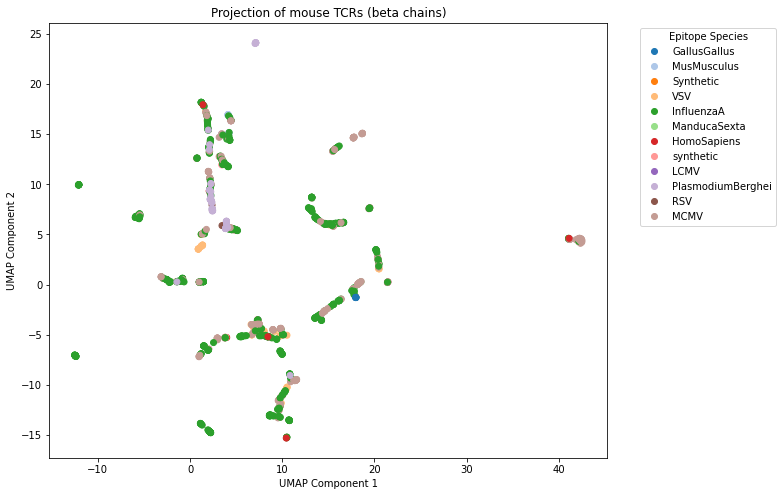

In [31]:

data = dfm_beta[["CDR3","V","J","Epitope",'EpitopeSpecies']].copy()


CDR3_encoder = LabelEncoder()
data.loc[:, 'encoded_CDR3'] = CDR3_encoder.fit_transform(data['CDR3'])

V_encoder = LabelEncoder()
data.loc[:, 'encoded_V'] = V_encoder.fit_transform(data['V'])

J_encoder = LabelEncoder()
data.loc[:, 'encoded_J'] = J_encoder.fit_transform(data['J'])

epitope_encoder = LabelEncoder()
data.loc[:, 'encoded_epitope'] = epitope_encoder.fit_transform(data['Epitope'])

features = data[['encoded_CDR3', 'encoded_V','encoded_J','encoded_epitope']]

reducer = umap.UMAP()
embedding = reducer.fit_transform(features)


unique_epitopes = data['EpitopeSpecies'].unique()
color_dict = {epitope: plt.cm.tab20(i) for i, epitope in enumerate(unique_epitopes)}

colors = [color_dict[epitope] for epitope in data['EpitopeSpecies']]

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title('Projection of mouse TCRs (beta chains)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

handles = [plt.Line2D([0], [0], marker='o', color=color_dict[epitope], label=epitope, linestyle='None') for epitope in unique_epitopes]
plt.legend(handles=handles, title='Epitope Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Plotting mouse TCRs alpha and beta chains

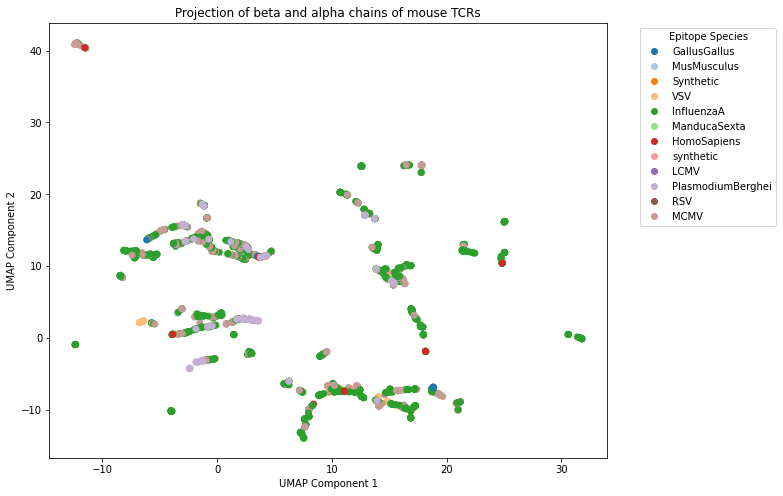

In [32]:

data = dfm[["CDR3","V","J","Epitope",'EpitopeSpecies']].copy()


CDR3_encoder = LabelEncoder()
data.loc[:, 'encoded_CDR3'] = CDR3_encoder.fit_transform(data['CDR3'])

V_encoder = LabelEncoder()
data.loc[:, 'encoded_V'] = V_encoder.fit_transform(data['V'])

J_encoder = LabelEncoder()
data.loc[:, 'encoded_J'] = J_encoder.fit_transform(data['J'])

epitope_encoder = LabelEncoder()
data.loc[:, 'encoded_epitope'] = epitope_encoder.fit_transform(data['Epitope'])

features = data[['encoded_CDR3', 'encoded_V','encoded_J','encoded_epitope']]

reducer = umap.UMAP()
embedding = reducer.fit_transform(features)

unique_epitopes = data['EpitopeSpecies'].unique()
color_dict = {epitope: plt.cm.tab20(i) for i, epitope in enumerate(unique_epitopes)}

colors = [color_dict[epitope] for epitope in data['EpitopeSpecies']]

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title('Projection of beta and alpha chains of mouse TCRs')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

handles = [plt.Line2D([0], [0], marker='o', color=color_dict[epitope], label=epitope, linestyle='None') for epitope in unique_epitopes]
plt.legend(handles=handles, title='Epitope Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Mesure the distance for alpha and beta data frames (Mouse):

To measure the distance we only need the following columns (ComplexID, CDR3,V, J, and optionally Epitope)

In [33]:
#dfm_beta

In [34]:
dfm_alpha_distance = dfm_alpha.drop(columns=['Gene','Species','MHCclass','EpitopeSpecies','Score'])
dfm_beta_distance = dfm_beta.drop(columns=['Gene','Species','MHCclass','EpitopeSpecies','Score'])
dfm_alpha_distance = dfm_alpha_distance.dropna()
dfm_beta_distance = dfm_beta_distance.dropna()

In [35]:
dfm_alpha_distance.isnull().values.any()

False

In [36]:
dfm_beta_distance.isnull().values.any()

False

In [37]:
len(dfm_alpha_distance)

927

In [38]:
len(dfm_beta_distance)

1194

In [39]:
num_duplicated_rows = dfm_alpha_distance.duplicated().sum()
num_duplicated_rows

0

In [40]:
num_duplicated_rows = dfm_beta_distance.duplicated().sum()
num_duplicated_rows

140

TCRDist3 uses a special naming for colmuns to mesure the distance. So we need to rename the colmuns in way that can be interpreated by algorthim.

In [41]:
dfm_alpha_distance = dfm_alpha_distance.rename(columns={'CDR3': 'cdr3_a_aa', 'V': 'v_a_gene', 'J': 'j_a_gene','Epitope': 'epitope'})
dfm_beta_distance = dfm_beta_distance.rename(columns={'CDR3': 'cdr3_b_aa', 'V': 'v_b_gene', 'J': 'j_b_gene','Epitope': 'epitope'})

In [42]:
dfm_alpha_distance

,ComplexID,cdr3_a_aa,v_a_gene,j_a_gene,epitope
0,106,CAMRGDYGGSGNKLIF,TRAV16*01,TRAJ32*01,INFDFNTI
1,108,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,SIYRYYGL
2,110,CAARYQGGRALIF,TRAV14-1*01,TRAJ15*01,KVITFIDL
3,112,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,EQYKFYSV
4,113,CAMRGDYGGSGNKLIF,TRAV16*01,TRAJ32*01,RGYVYQGL
...,...,...,...,...,...
922,0,CATDHMQQGTGSKLSF,TRAV8-2*01,TRAJ58*01,SQLLNAKYL
923,0,CVLTNTEGADRLTF,TRAV13-5*01,TRAJ45*01,SQLLNAKYL
924,0,CATPGGNYKPTF,TRAV8D-2*01,TRAJ6*01,SQLLNAKYL
925,0,CAARGYNQGKLIF,TRAV14-2*01,TRAJ23*01,SQLLNAKYL


Adding count columns to the data frame. (PS: We need to keep the ComplexID column because it helps us prevent grouping two identical rows from two different donors into one row which will simply have a consequence when comes to calculating the distance. 

In [43]:
dfm_alpha_distance = dfm_alpha_distance.groupby(dfm_alpha_distance.columns.tolist()).size().reset_index().rename(columns={0:'count'})

In [44]:
dfm_beta_distance = dfm_beta_distance.groupby(dfm_beta_distance.columns.tolist()).size().reset_index().rename(columns={0:'count'})

# Distaince between alpha chains (Mouse)

In [45]:
#this distance include also alpha chains that has no beta chain countrypart (complexID = 0)
from tcrdist.repertoire import TCRrep

tr = TCRrep(cell_df = dfm_alpha_distance, 
            organism = 'mouse', 
            chains = ['alpha'], 
            compute_distances = True,
            db_file = 'alphabeta_gammadelta_db.tsv')

trm_alpha = tr.pw_alpha
trm_alpha

array([[  0,  90, 128, ..., 128, 130,  98],
       [ 90,   0, 128, ..., 128, 145, 119],
       [128, 128,   0, ..., 107, 142, 161],
       ...,
       [128, 128, 107, ...,   0, 144, 158],
       [130, 145, 142, ..., 144,   0, 164],
       [ 98, 119, 161, ..., 158, 164,   0]], dtype=int16)

# Distaince between beta chain (Mouse)

In [46]:
#this distance include also beta chains that has no alpha chain countrypart (complexID = 0)
tr = TCRrep(cell_df = dfm_beta_distance, 
            organism = 'mouse', 
            chains = ['beta'],
            compute_distances = True,
            db_file = 'alphabeta_gammadelta_db.tsv')

trm_beta = tr.pw_beta
trm_beta

array([[  0,  84,  60, ...,  65, 117, 164],
       [ 84,   0,  48, ..., 104, 153, 173],
       [ 60,  48,   0, ...,  80, 129, 167],
       ...,
       [ 65, 104,  80, ...,   0, 114, 163],
       [117, 153, 129, ..., 114,   0, 127],
       [164, 173, 167, ..., 163, 127,   0]], dtype=int16)

# Distance between alpha and beta chains (mouse) "Moving complex.ID 0"

In [47]:
dfm_zero_alpha_complexID = dfm_alpha_distance[dfm_alpha_distance['ComplexID'] == 0]

In [48]:
len(dfm_zero_alpha_complexID)

25

In [49]:
dfm_zero_beta_complexID = dfm_beta_distance[dfm_beta_distance['ComplexID'] == 0]

In [50]:
len(dfm_zero_beta_complexID)

129

In [51]:
dfm_nonzero_alpha = dfm_alpha_distance[dfm_alpha_distance['ComplexID'] != 0]

In [52]:
len(dfm_nonzero_alpha)

902

In [53]:
dfm_nonzero_beta = dfm_beta_distance[dfm_beta_distance['ComplexID'] != 0]

In [54]:
len(dfm_nonzero_beta)

925

In [55]:
merged_dfm_nonzero = pd.merge(dfm_nonzero_alpha, dfm_nonzero_beta, on='ComplexID', how='inner')

In [57]:
#merged_dfm_nonzero

In [58]:
merged_dfm_nonzero = merged_dfm_nonzero[['ComplexID','cdr3_a_aa','v_a_gene','j_a_gene','cdr3_b_aa','v_b_gene','j_b_gene','epitope_x']]
merged_dfm_nonzero = merged_dfm_nonzero.groupby(merged_dfm_nonzero.columns.tolist()).size().reset_index().rename(columns={0:'count'})
merged_dfm_nonzero = merged_dfm_nonzero.rename(columns={'epitope_x':'epitope'})

In [59]:
#merged_dfm_nonzero

In [60]:
tr = TCRrep(cell_df = merged_dfm_nonzero, 
            organism = 'mouse', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

trm_beta = tr.pw_beta
trm_alpah = tr.pw_alpha
tr_alpha_beta = trm_beta + trm_alpah
tr_alpha_beta


array([[  0, 291, 266, ..., 280, 268, 322],
       [291,   0, 317, ..., 295, 313, 352],
       [266, 317,   0, ..., 306, 355, 354],
       ...,
       [280, 295, 306, ...,   0, 258, 321],
       [268, 313, 355, ..., 258,   0, 291],
       [322, 352, 354, ..., 321, 291,   0]], dtype=int16)

# Human Data Cleaning and Mesuring the distance.

In [61]:
#dfh

In [62]:
dfh = dfh.dropna()

In [63]:
dfh.isnull().values.any()

False

In [64]:
dfh_alpha = dfh[dfh['Gene'] == 'TRA']
dfh_beta= dfh[dfh['Gene'] == 'TRB']

In [65]:
dfh_alpha.reset_index(drop=True, inplace=True)
dfh_beta.reset_index(drop=True, inplace=True)

In [68]:
#dfh_alpha

In [69]:
len(dfh_beta)

6596

# Plotting human TCRs alpha chains:

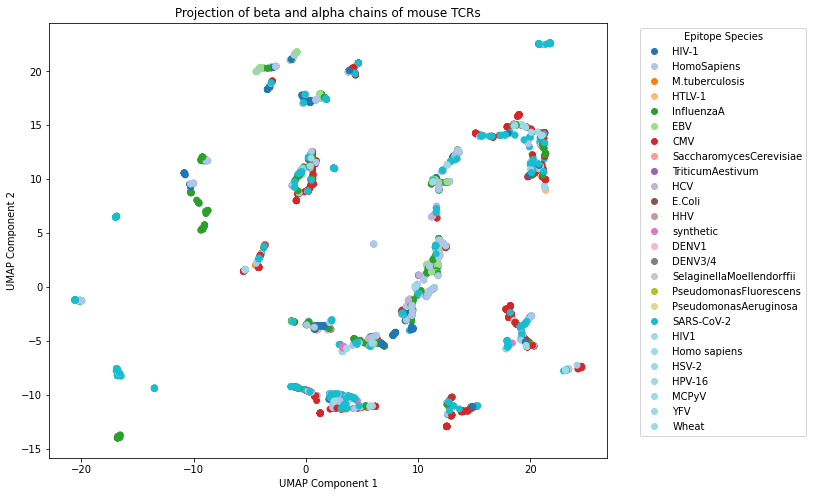

In [70]:

data = dfh_alpha[["CDR3","V","J","Epitope",'EpitopeSpecies']].copy()


CDR3_encoder = LabelEncoder()
data.loc[:, 'encoded_CDR3'] = CDR3_encoder.fit_transform(data['CDR3'])

V_encoder = LabelEncoder()
data.loc[:, 'encoded_V'] = V_encoder.fit_transform(data['V'])

J_encoder = LabelEncoder()
data.loc[:, 'encoded_J'] = J_encoder.fit_transform(data['J'])

epitope_encoder = LabelEncoder()
data.loc[:, 'encoded_epitope'] = epitope_encoder.fit_transform(data['Epitope'])

features = data[['encoded_CDR3', 'encoded_V','encoded_J','encoded_epitope']]

reducer = umap.UMAP()
embedding = reducer.fit_transform(features)

unique_epitopes = data['EpitopeSpecies'].unique()
color_dict = {epitope: plt.cm.tab20(i) for i, epitope in enumerate(unique_epitopes)}

colors = [color_dict[epitope] for epitope in data['EpitopeSpecies']]

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title('Projection of beta and alpha chains of mouse TCRs')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

handles = [plt.Line2D([0], [0], marker='o', color=color_dict[epitope], label=epitope, linestyle='None') for epitope in unique_epitopes]
plt.legend(handles=handles, title='Epitope Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Plotting human TCRs beta chains:

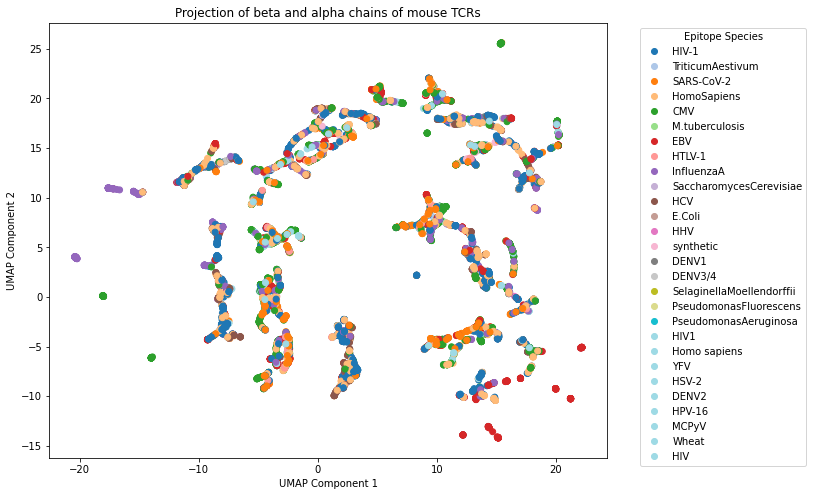

In [71]:

data = dfh_beta[["CDR3","V","J","Epitope",'EpitopeSpecies']].copy()


CDR3_encoder = LabelEncoder()
data.loc[:, 'encoded_CDR3'] = CDR3_encoder.fit_transform(data['CDR3'])

V_encoder = LabelEncoder()
data.loc[:, 'encoded_V'] = V_encoder.fit_transform(data['V'])

J_encoder = LabelEncoder()
data.loc[:, 'encoded_J'] = J_encoder.fit_transform(data['J'])

epitope_encoder = LabelEncoder()
data.loc[:, 'encoded_epitope'] = epitope_encoder.fit_transform(data['Epitope'])

features = data[['encoded_CDR3', 'encoded_V','encoded_J','encoded_epitope']]

reducer = umap.UMAP()
embedding = reducer.fit_transform(features)


unique_epitopes = data['EpitopeSpecies'].unique()
color_dict = {epitope: plt.cm.tab20(i) for i, epitope in enumerate(unique_epitopes)}

colors = [color_dict[epitope] for epitope in data['EpitopeSpecies']]

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title('Projection of beta and alpha chains of mouse TCRs')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

handles = [plt.Line2D([0], [0], marker='o', color=color_dict[epitope], label=epitope, linestyle='None') for epitope in unique_epitopes]
plt.legend(handles=handles, title='Epitope Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Plotting human TCRs alpha and beta chains:

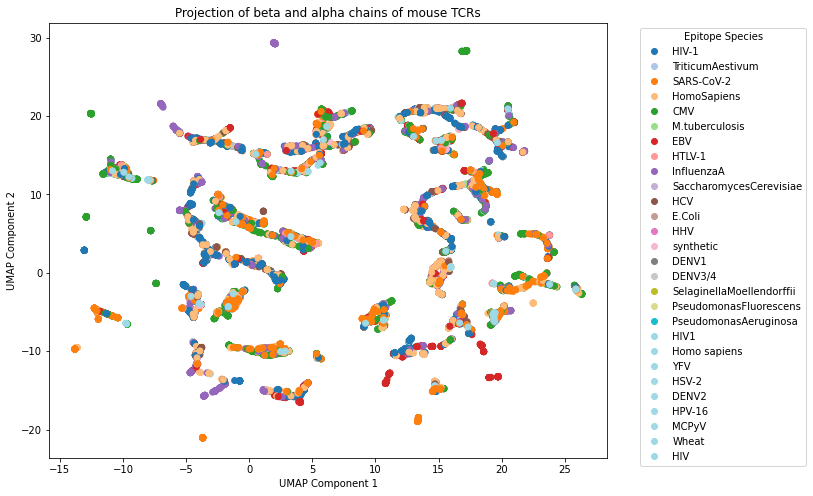

In [72]:

data = dfh[["CDR3","V","J","Epitope",'EpitopeSpecies']].copy()


CDR3_encoder = LabelEncoder()
data.loc[:, 'encoded_CDR3'] = CDR3_encoder.fit_transform(data['CDR3'])

V_encoder = LabelEncoder()
data.loc[:, 'encoded_V'] = V_encoder.fit_transform(data['V'])

J_encoder = LabelEncoder()
data.loc[:, 'encoded_J'] = J_encoder.fit_transform(data['J'])

epitope_encoder = LabelEncoder()
data.loc[:, 'encoded_epitope'] = epitope_encoder.fit_transform(data['Epitope'])

features = data[['encoded_CDR3', 'encoded_V','encoded_J','encoded_epitope']]

reducer = umap.UMAP()
embedding = reducer.fit_transform(features)

unique_epitopes = data['EpitopeSpecies'].unique()
color_dict = {epitope: plt.cm.tab20(i) for i, epitope in enumerate(unique_epitopes)}


colors = [color_dict[epitope] for epitope in data['EpitopeSpecies']]

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=colors)
plt.title('Projection of beta and alpha chains of mouse TCRs')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

handles = [plt.Line2D([0], [0], marker='o', color=color_dict[epitope], label=epitope, linestyle='None') for epitope in unique_epitopes]
plt.legend(handles=handles, title='Epitope Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Measure the distance for alpha and beta dataframes (Human):

In [73]:
#dfh_alpha

In [74]:
dfh_alpha_distance = dfh_alpha.drop(columns=['Gene','Species','MHCclass','EpitopeSpecies','Score'])
dfh_beta_distance = dfh_beta.drop(columns=['Gene','Species','MHCclass','EpitopeSpecies','Score'])
dfh_alpha_distance = dfh_alpha_distance.dropna()
dfh_beta_distance = dfh_beta_distance.dropna()

In [75]:
dfh_alpha_distance.isnull().values.any()

False

In [76]:
dfh_beta_distance.isnull().values.any()

False

In [77]:
num_duplicated_rows = dfh_alpha_distance.duplicated().sum()
num_duplicated_rows

361

In [78]:
num_duplicated_rows = dfh_beta_distance.duplicated().sum()
num_duplicated_rows

1351

In [79]:
dfh_alpha_distance = dfh_alpha_distance.rename(columns={'CDR3': 'cdr3_a_aa', 'V': 'v_a_gene', 'J': 'j_a_gene','Epitope': 'epitope'})
dfh_beta_distance = dfh_beta_distance.rename(columns={'CDR3': 'cdr3_b_aa', 'V': 'v_b_gene', 'J': 'j_b_gene','Epitope': 'epitope'})

In [80]:
dfh_alpha_distance = dfh_alpha_distance.groupby(dfh_alpha_distance.columns.tolist()).size().reset_index().rename(columns={0:'count'})
len(dfh_alpha_distance)

2419

In [81]:
dfh_beta_distance = dfh_beta_distance.groupby(dfh_beta_distance.columns.tolist()).size().reset_index().rename(columns={0:'count'})
len(dfh_beta_distance)

5245

In [83]:
#dfh_alpha_distance

In [84]:
#dfh_beta_distance

# Distance betwen alpha chains (human)

In [85]:
tr = TCRrep(cell_df = dfh_alpha_distance, 
            organism = 'human', 
            chains = ['alpha'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.pw_alpha

array([[  0, 162, 163, ..., 182, 171, 157],
       [162,   0,  92, ..., 160, 156,  98],
       [163,  92,   0, ..., 160, 176,  63],
       ...,
       [182, 160, 160, ...,   0, 141, 133],
       [171, 156, 176, ..., 141,   0, 158],
       [157,  98,  63, ..., 133, 158,   0]], dtype=int16)

# Distance between beta chains (human)

In [86]:
tr = TCRrep(cell_df = dfh_beta_distance, 
            organism = 'human', 
            chains = ['beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

tr.pw_beta

array([[  0, 170, 159, ..., 151, 141, 140],
       [170,   0, 127, ..., 148, 174, 160],
       [159, 127,   0, ..., 140, 157, 153],
       ...,
       [151, 148, 140, ...,   0, 121,  97],
       [141, 174, 157, ..., 121,   0, 122],
       [140, 160, 153, ...,  97, 122,   0]], dtype=int16)

# Distance between alpha and beta chains (human) "Moving complex.ID 0"

In [87]:
dfh_zero_alpha_complexID = dfh_alpha_distance[dfh_alpha_distance['ComplexID'] == 0]

In [88]:
len(dfh_zero_alpha_complexID)

478

In [89]:
dfh_zero_beta_complexID = dfh_beta_distance[dfh_beta_distance['ComplexID'] == 0]

In [90]:
len(dfh_zero_beta_complexID)

3279

In [91]:
dfh_nonzero_alpha = dfh_alpha_distance[dfh_alpha_distance['ComplexID'] != 0]

In [92]:
dfh_nonzero_beta = dfh_beta_distance[dfh_beta_distance['ComplexID'] != 0]

In [93]:
len(dfh_nonzero_alpha)

1941

In [94]:
len(dfh_nonzero_beta)

1966

In [95]:
merged_dfh_nonzero = pd.merge(dfh_nonzero_alpha, dfh_nonzero_beta, on='ComplexID', how='inner')

In [96]:
len(merged_dfh_nonzero)

1868

In [97]:
merged_dfh_nonzero = merged_dfh_nonzero[['ComplexID','cdr3_a_aa','v_a_gene','j_a_gene','cdr3_b_aa','v_b_gene','j_b_gene','epitope_x']]
merged_dfh_nonzero = merged_dfh_nonzero.groupby(merged_dfh_nonzero.columns.tolist()).size().reset_index().rename(columns={0:'count'})
merged_dfh_nonzero = merged_dfh_nonzero.rename(columns={'epitope_x':'epitope'})

In [99]:
#merged_dfh_nonzero

In [100]:
tr = TCRrep(cell_df = merged_dfh_nonzero, 
            organism = 'human', 
            chains = ['alpha','beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv')

trh_beta = tr.pw_beta
trh_alpah = tr.pw_alpha
trh = trh_alpah + trh_beta
trh

array([[  0, 177, 289, ..., 352, 391, 326],
       [177,   0, 310, ..., 322, 331, 297],
       [289, 310,   0, ..., 266, 297, 254],
       ...,
       [352, 322, 266, ...,   0, 262, 230],
       [391, 331, 297, ..., 262,   0, 280],
       [326, 297, 254, ..., 230, 280,   0]], dtype=int16)

# Clustering: